### Welcome to the Southern Water Corp Python Case Study!

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data.

Now, Joanna Luez — Southern Water Corp's Lead Scientist — has requested that you convert your earlier analysis in Excel to Python Code. After all, with all the formulas in Excel, it can be tricky for others with less experience in Excel to follow.

Excel is an excellent tool for adhoc analysis, but Python is an invaluable tool thanks to its advanced data analysis capabilities that only take a few lines of code to complete.

**Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2. 

### Let's get started!

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 



## Place your code here

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data you will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data you will need for questions 10 Onwards.

We have **deliberately** set up the data in this manner so please ensure that when you need to perform the rolling standard deviation calculations, you use the **DF_Rolling_Stdev.csv** file.

i. Import each of the two data sources and store them into their individual dataframes. 


ii. Print descriptive statistics for each of the dataframes using

In [8]:
df_raw = pd.read_csv('C:\\Users\\sarth\\Desktop\\Sprinboard Data Analyst Bootcamp\\Unit 15 - Python\\15.6 - Case Study 1\\DF_Raw_Data.csv')
df_stdev = pd.read_csv('C:\\Users\\sarth\\Desktop\\Sprinboard Data Analyst Bootcamp\\Unit 15 - Python\\15.6 - Case Study 1\\DF_Rolling_Stdev.csv')

print(df_raw.describe()) 
print(df_raw.info())
print(df_stdev.describe()) 
print(df_raw.info())   

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Visualize Data</span> 

i) Using the dataframe_raw, create a boxplot visualising this information.

ii) Using the dataframe_raw, create a lineplot visualising this information.



### Please put your code here


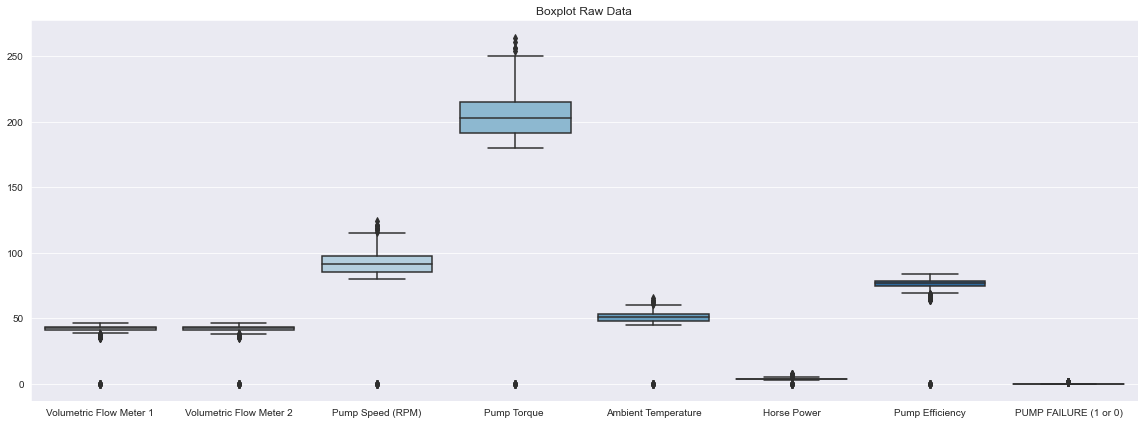

In [347]:
plt.figure(figsize = (16,6))
sns.set_style('darkgrid')
sns.boxplot(data=df_raw, palette = 'Blues')
plt.title('Boxplot Raw Data')
plt.tight_layout()
plt.show()

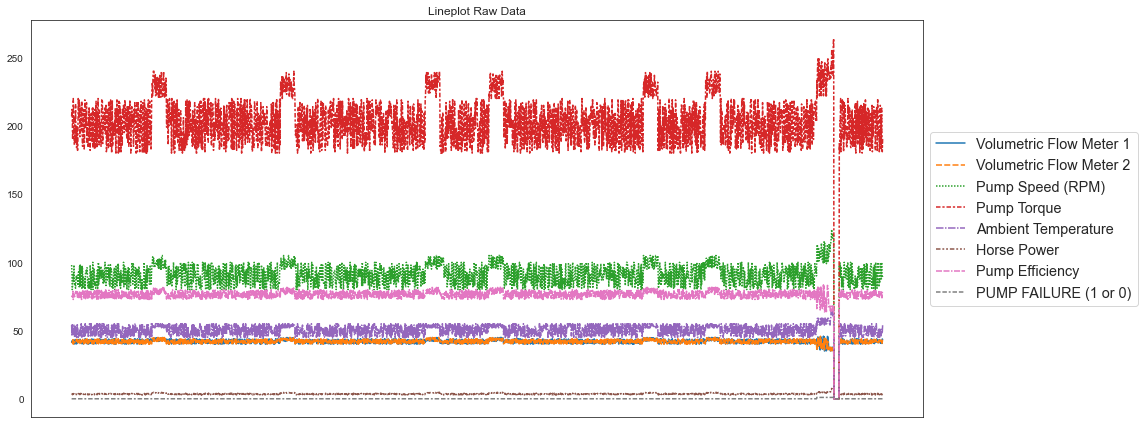

In [457]:
x = plt.figure(figsize = (16, 6))
sns.set_style('white')
x = sns.lineplot(data=df_raw)
x.set(xticklabels=[])
x = plt.title('Lineplot Raw Data')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), fontsize = 'x-large')
plt.tight_layout()
plt.show()

###  Some variables, due to their range and size of values, dwarfs some of the other variables which makes the variation difficult to see. 

### More importantly, the dataset we do have contains Pump Failure Data where it has failed (i.e. Pump Failure = 0) as well as when it is operating normally. We should separate this data accordingly to more effectively visualise the information.

---------------------------------------------------------------------------

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 




## Please put your code here

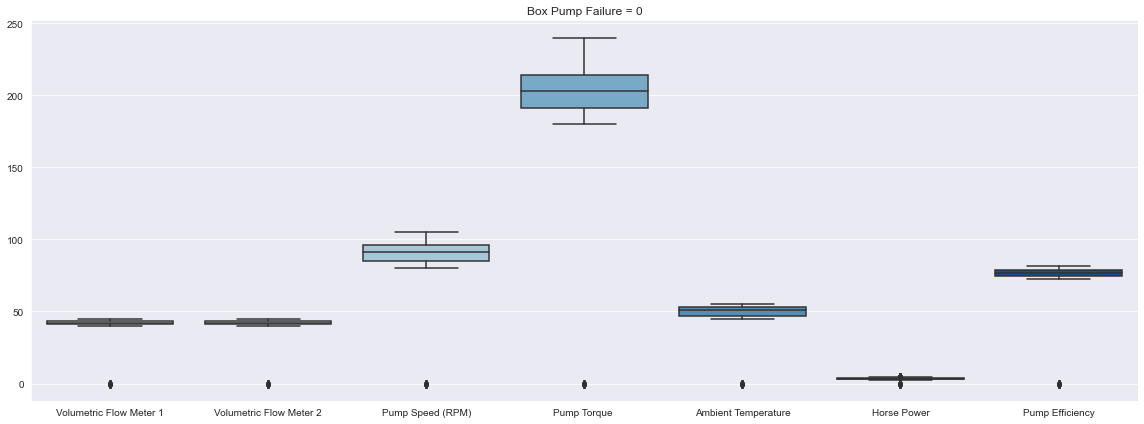

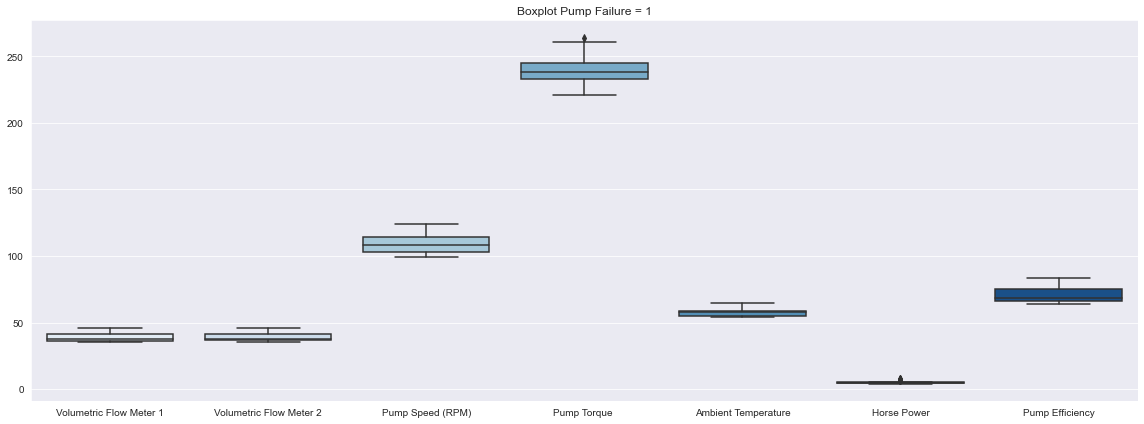

In [352]:
pump0 = df_raw['PUMP FAILURE (1 or 0)'] == 0
pump1 = df_raw['PUMP FAILURE (1 or 0)'] == 1

df_raw0 = df_raw[pump0]

df_raw1 = df_raw[pump1]

plt.figure(figsize = (16,6))
sns.boxplot(data = df_raw0.loc[:, df_raw0.columns!="PUMP FAILURE (1 or 0)"], palette = 'Blues')
sns.set_style('darkgrid')
plt.title('Box Pump Failure = 0')
plt.tight_layout()

plt.figure(figsize = (16,6))
sns.boxplot(data = df_raw1.loc[:, df_raw1.columns!="PUMP FAILURE (1 or 0)"], palette = 'Blues')
sns.set_style('darkgrid')
plt.title('Boxplot Pump Failure = 1')
plt.tight_layout()
plt.show()

### Step 5: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. 

Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range for all columns in the dataframe and print it to the screen.

## Please put your code here

In [184]:
Q1 = df_raw.quantile(0.25)
Q3 = df_raw.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

How many outliers do you have? What will happen to your dataset if you remove them all? Let's find out!

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.



## Please put your code here

In [480]:
print('Number of entries in the original dataframe = ', (df_raw.shape[0]))
no_outliers = df_raw[~((df_raw < (Q1 - 1.5 * IQR)) |(df_raw > (Q3 + 1.5 * IQR))).any(axis=1)]
no_outliers = no_outliers.iloc[:, 2:]
#no_outliers
# df_variables = df_raw.iloc[:,2:]
# count_no_outliers = no_outliers.count()
# count_variables = df_variables.count()
# print(no_outliers)
print('Number of Outliers =', (df_raw.shape[0] - no_outliers.shape[0]))
proportion = round(((df_raw.shape[0] - no_outliers.shape[0])/df_raw.shape[0] * 100), 2)
print('proportion of outliers =', proportion, '%')

Number of entries in the original dataframe =  2453
Number of Outliers = 95
proportion of outliers = 3.87 %


### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1 

ii) A boxplot when PUMP FAILURE is 0 



## Please put your code here

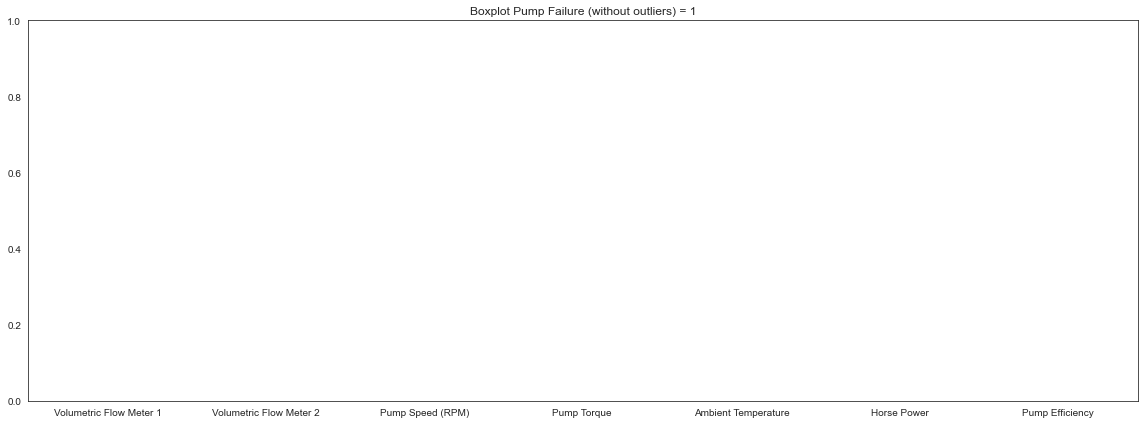

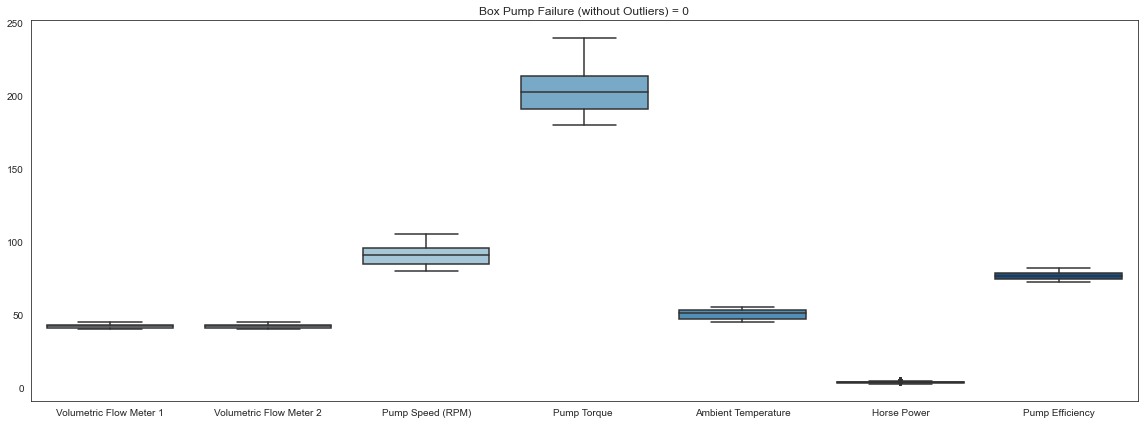

In [441]:
no_outliers0 = no_outliers['PUMP FAILURE (1 or 0)'] == 0
no_outliers1 = no_outliers['PUMP FAILURE (1 or 0)'] == 1

df_no_outliers0 = no_outliers[no_outliers0]

df_no_outliers1 = no_outliers[no_outliers1]



plt.figure(figsize = (16,6))
sns.boxplot(data = df_no_outliers1.loc[:, df_no_outliers1.columns!="PUMP FAILURE (1 or 0)"], palette = 'Blues')
plt.title('Boxplot Pump Failure (without outliers) = 1')
sns.set_style('white')
plt.tight_layout()
plt.show()

plt.figure(figsize = (16,6))
sns.boxplot(data = df_no_outliers0.loc[:, df_no_outliers0.columns!="PUMP FAILURE (1 or 0)"], palette = 'Blues')
plt.title('Box Pump Failure (without Outliers) = 0')
plt.tight_layout()


### Based on the boxplots created, we come to the conclusion that, for this case study, we actually shouldn't remove the outliers, as we are attempting to understand the Pump Failure Behavior and the portion of data you need is actually stored WITHIN the Outliers.

### This is exactly we should never remove Outliers without Subject Matter Expertise input. Otherwise valuable information may be discarded.

-----

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is why we are going to iterate through the dataframe and plot each individual variable out and compare this with the Pump Failure.

Loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends.

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Behaviour (0 or 1) on the second Y-axis, and the attribute on the first Y-Axis. 
Also, please ensure that the dataframe you are plotting contains all the outliers and that the Pump Failure Behaviour includes both the 0 and 1 State.

## Please put your code here

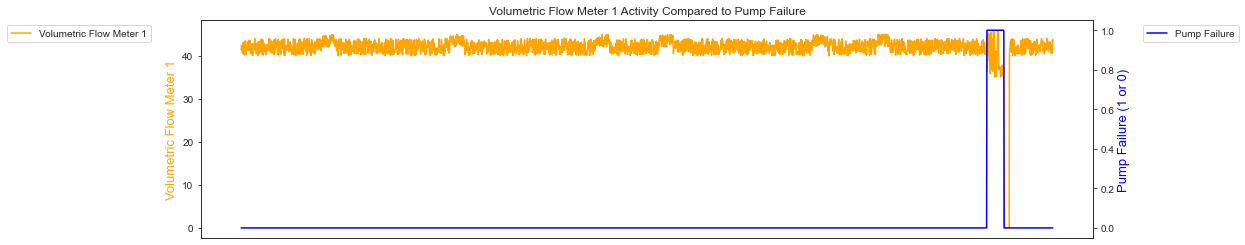

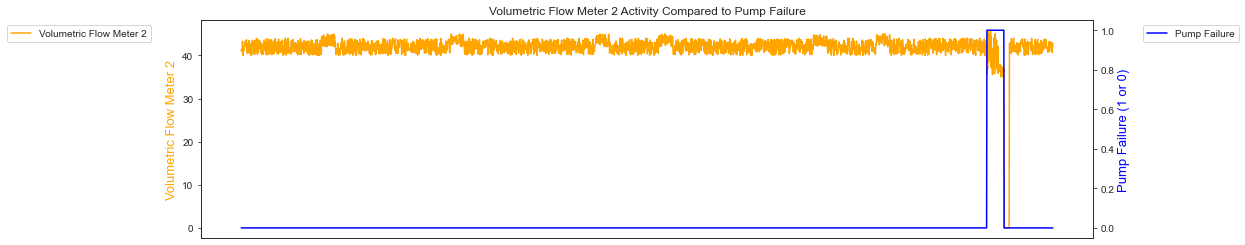

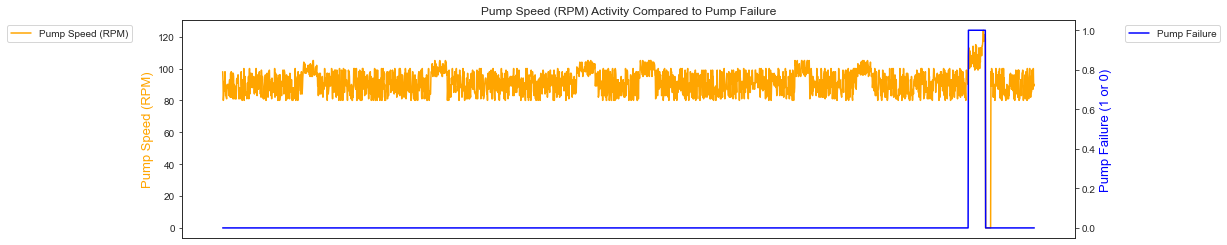

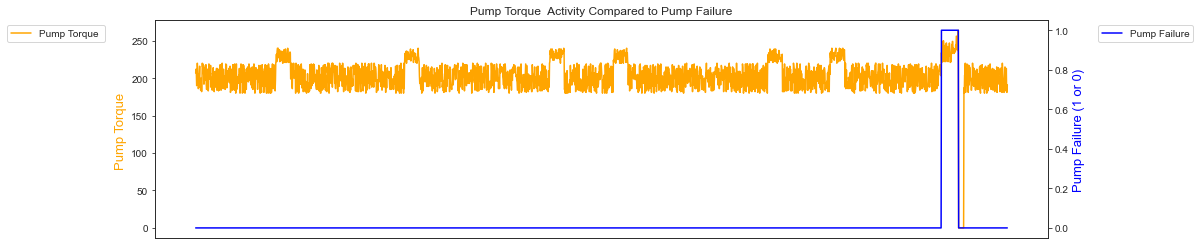

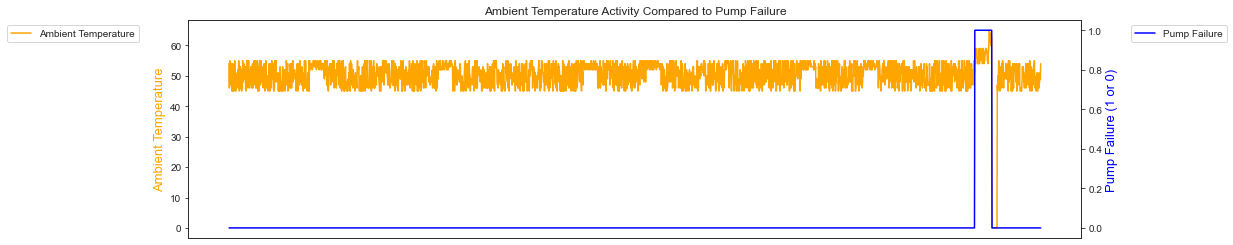

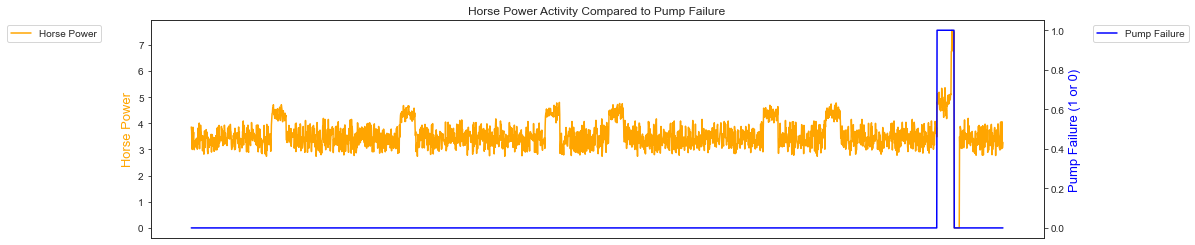

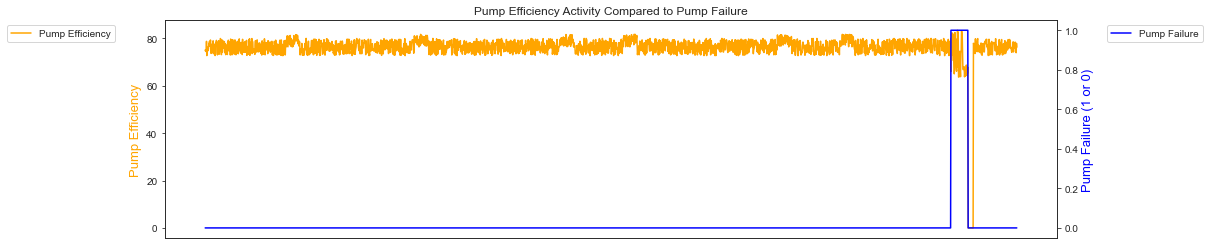

In [440]:
for i in df_variables.loc[:, df_variables.columns!="PUMP FAILURE (1 or 0)"]:
    plt.figure(figsize = (16,4))
    ax = df_variables[i].plot(color = 'orange')
    ax.axes.get_xaxis().set_visible(False)
    sns.set_style('white')
    ax.set_ylabel(i, color = 'orange', fontsize = 13)
    plt.legend(loc = 'upper right', bbox_to_anchor=(-0.05, 1), fontsize = 'medium')
    
    ax2 = ax.twinx()
    ax2.plot(df_variables['PUMP FAILURE (1 or 0)'], label='Pump Failure', color = 'blue')
    ax2.set_ylabel('Pump Failure (1 or 0)', color = 'blue', fontsize = 13)
    plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1), fontsize = 'medium')
    
    
    plt.title(i + " Activity Compared to Pump Failure")


### What do you notice when looking at the data in this way? Do any particular trends emerge?

In [ ]:
#From the above graphs, we can conclude that when the pump fails, several variables such as Horse Power, Pump Torque and Pump Speed abnromally rise and pump efficiency decreases.


---

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index** of the dataframe to the TIMEFRAME (DD/MM/YYYY) attribute


ii) Exactly as you did in Q8, Re-plot all variables, now transformed via a rolling standard deviation in the dataframe_stdev for the time period 10/12/2014 13:30 to 10/12/2014 14:30 against Pump Failure.


## Please put your code here

### The output from your code should display image(s) like the one shown below

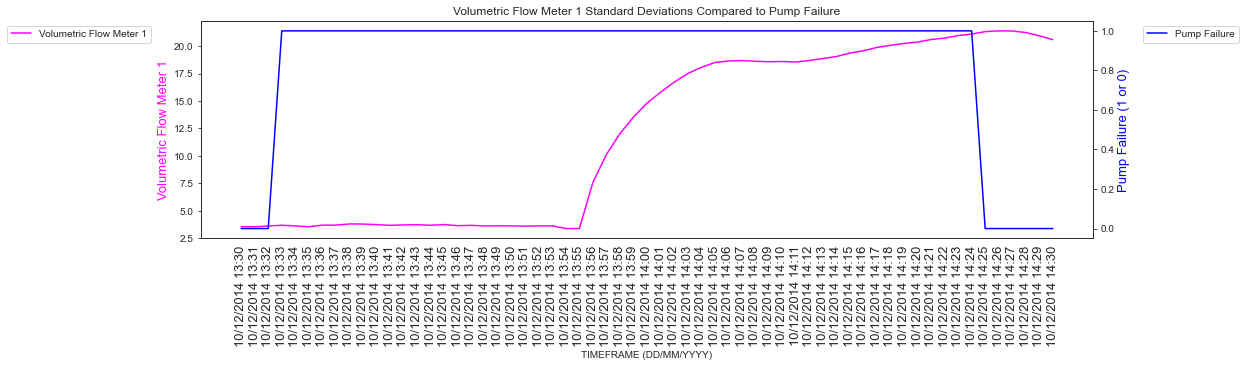

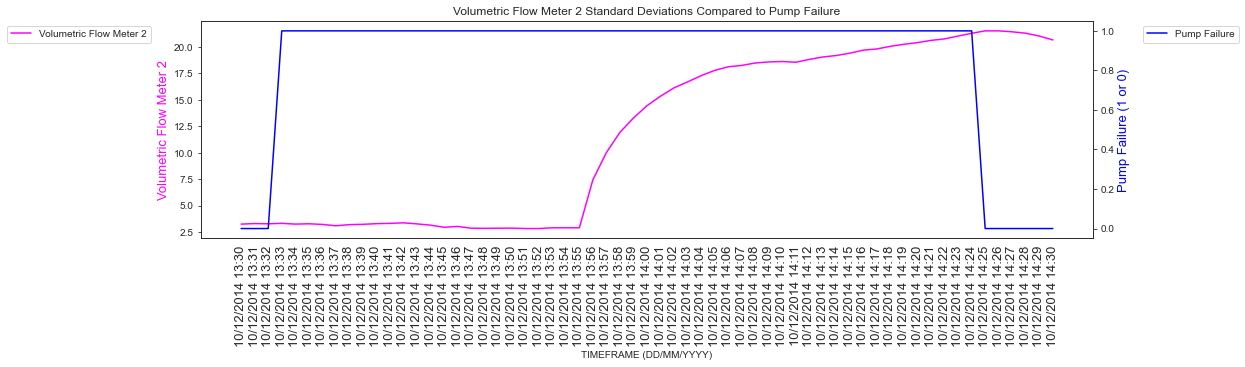

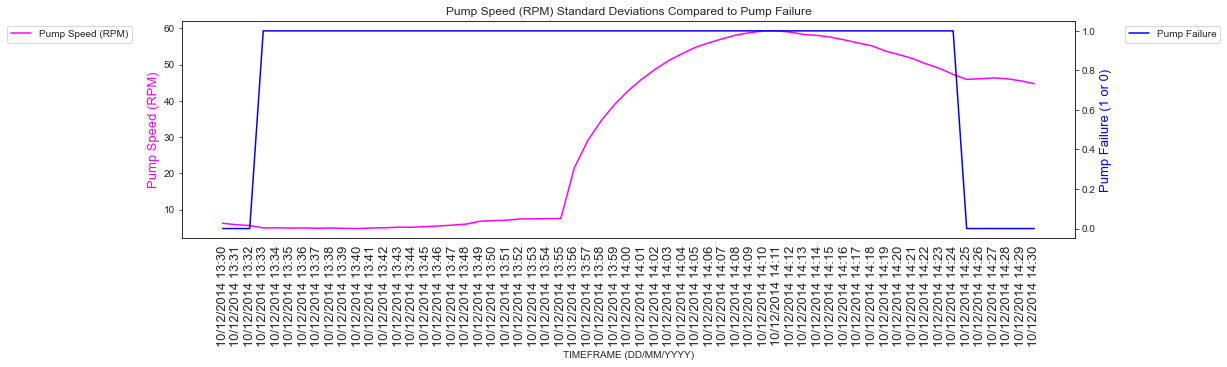

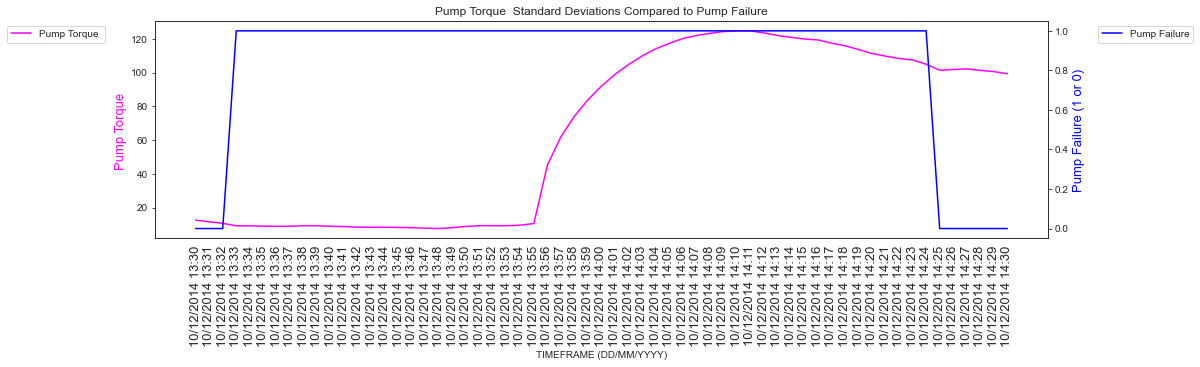

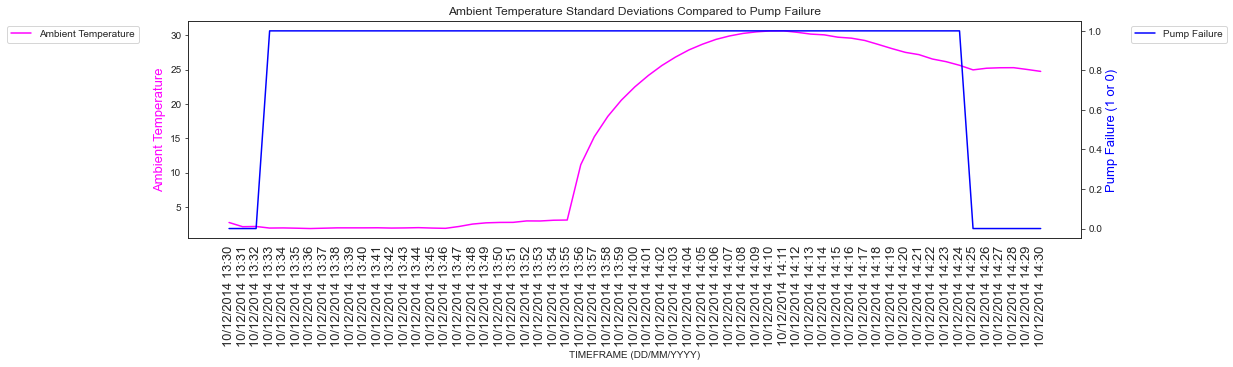

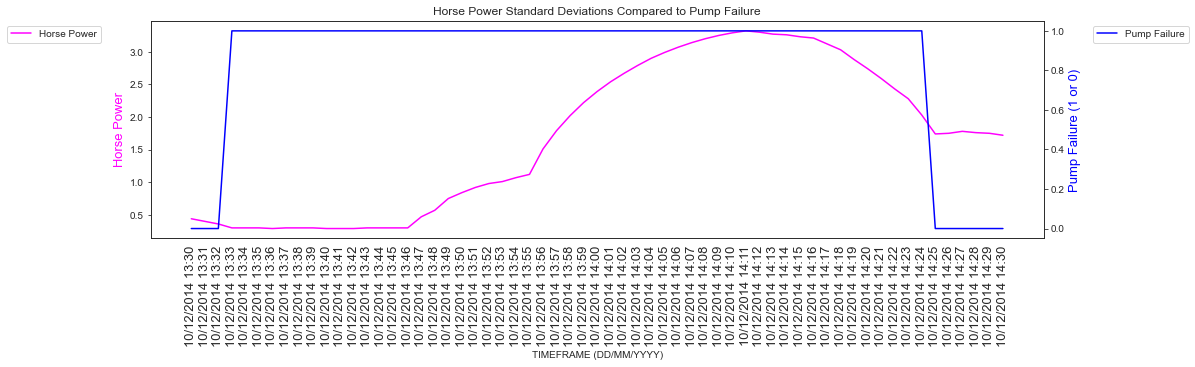

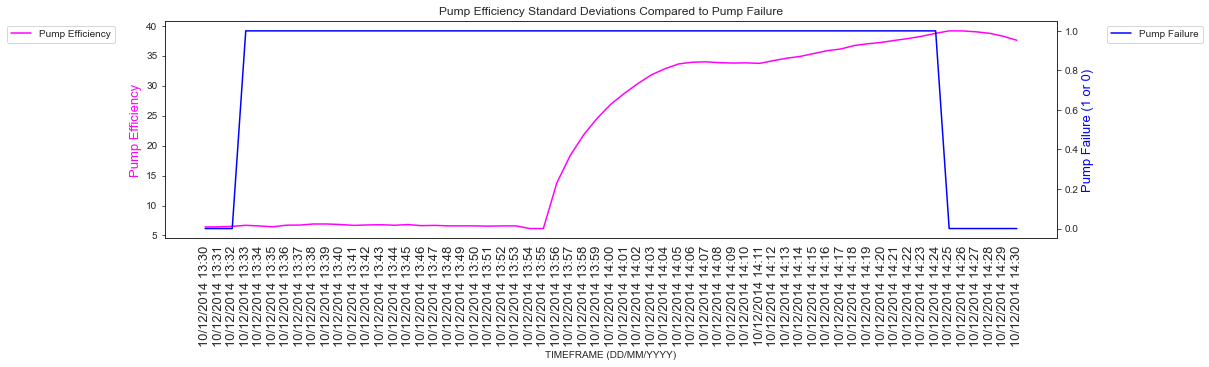

In [434]:
df_stdev_meas = df_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')
df_stdev_meas = df_stdev_meas.iloc[:, 1:9]
df_time_filtered = df_stdev_meas.loc["10/12/2014 13:30":"10/12/2014 14:30"]

for x in df_time_filtered.loc[:, df_variables.columns!="PUMP FAILURE (1 or 0)"]:
    plt.figure(figsize = (16,4))
    ax3 = df_time_filtered[x].plot(color = 'magenta')
    plt.xticks(rotation=90, fontsize = 13)
    sns.set_style('white')
    ax3.set_ylabel(x, color = 'magenta', fontsize = 13)
    plt.legend(loc = 'upper right', bbox_to_anchor=(-0.05, 1), fontsize = 'medium')

    
    ax4 = ax3.twinx()
    ax4.plot(df_time_filtered['PUMP FAILURE (1 or 0)'], label='Pump Failure', color = 'blue')
    ax4.set_ylabel('Pump Failure (1 or 0)', color = 'blue', fontsize = 13) 
    plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1), fontsize = 'medium')
    plt.title(x + " Standard Deviations Compared to Pump Failure")
    plt.show()

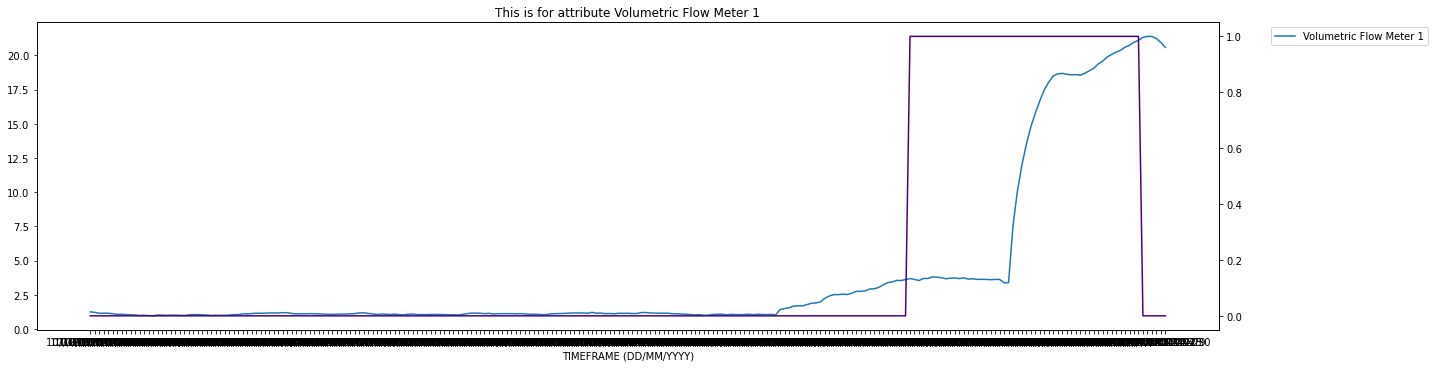

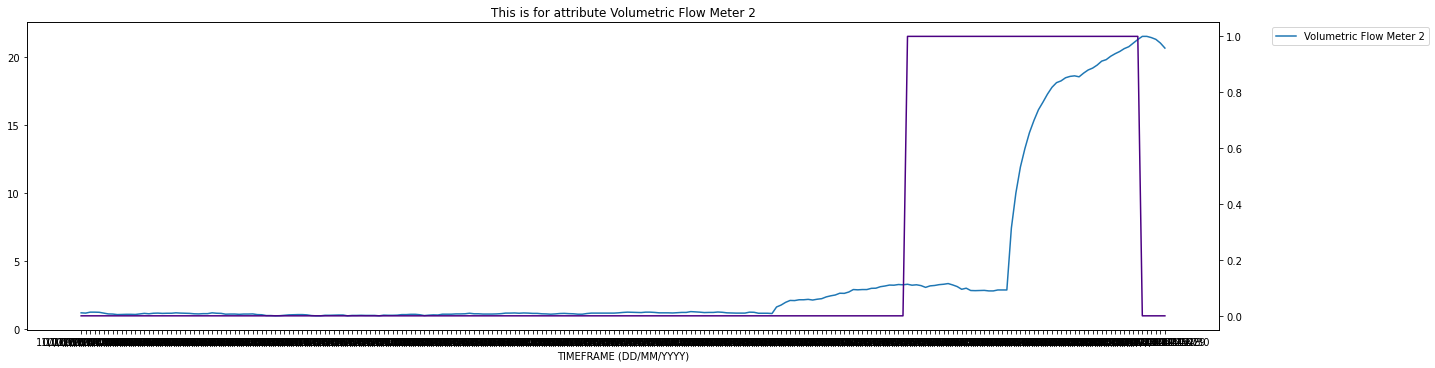

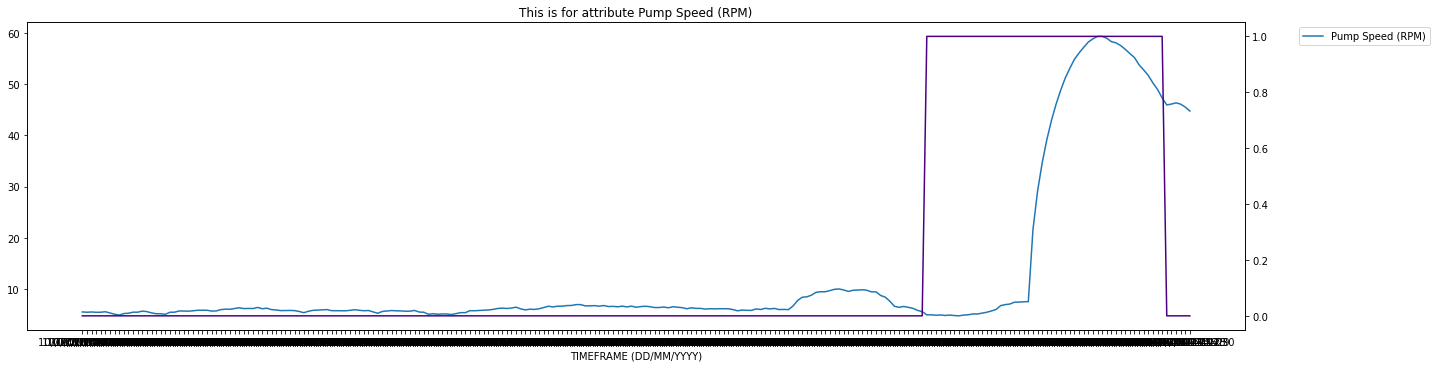

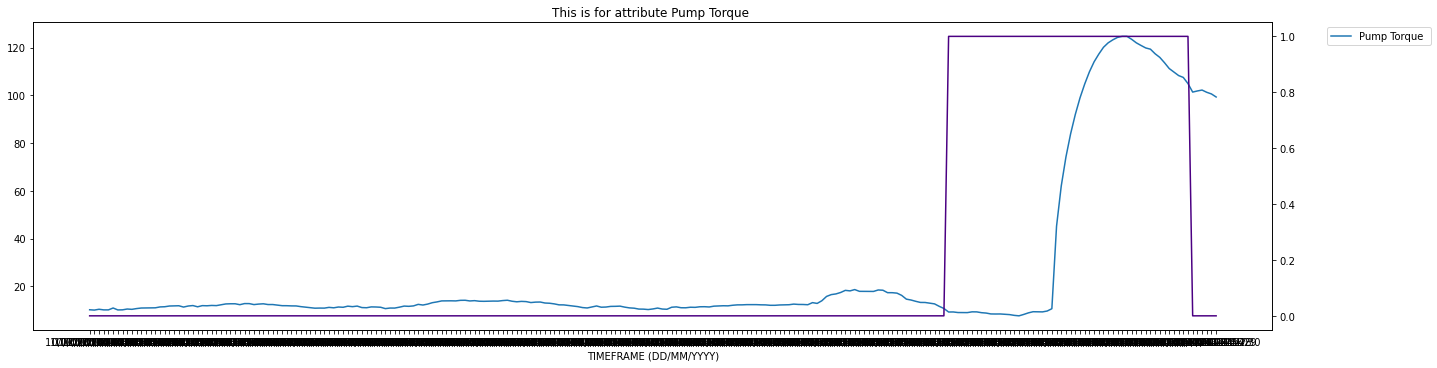

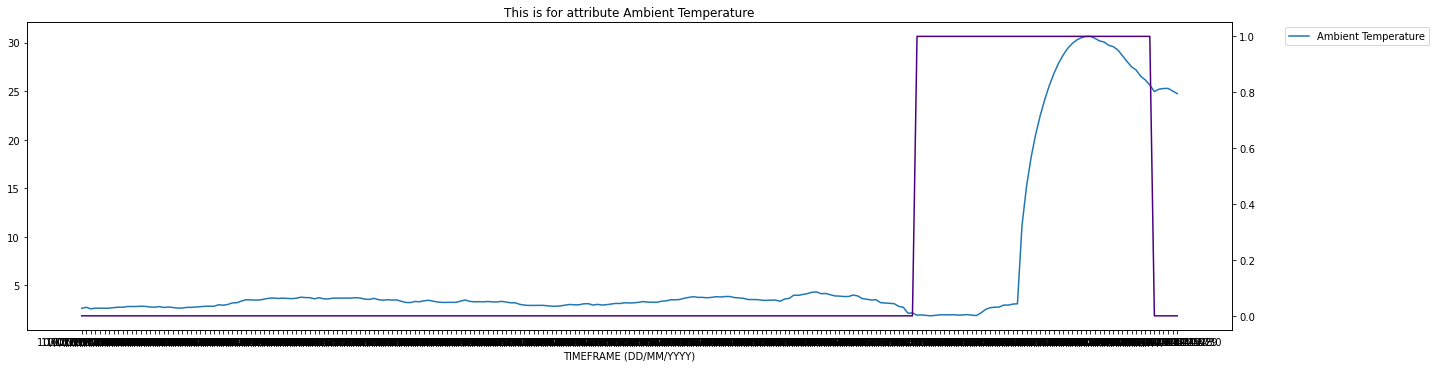

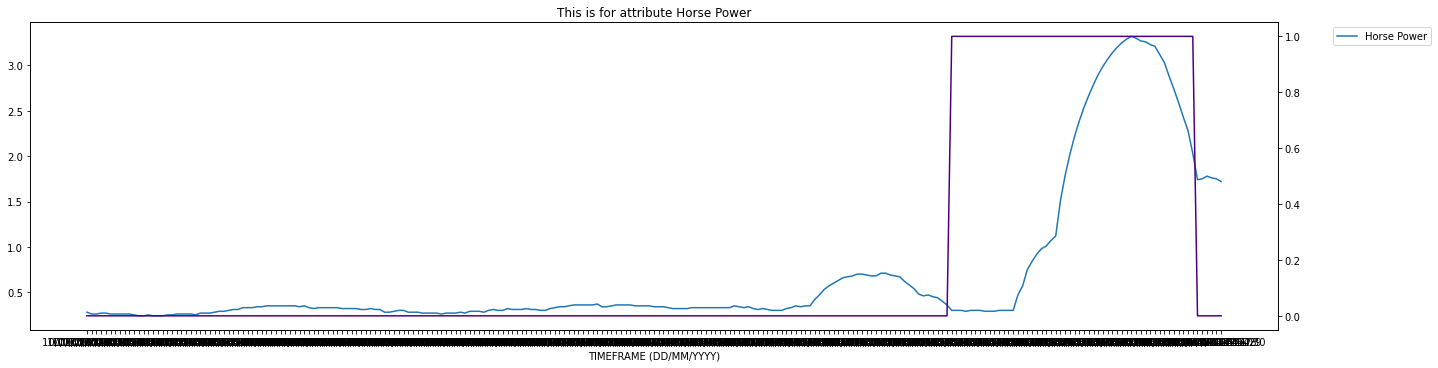

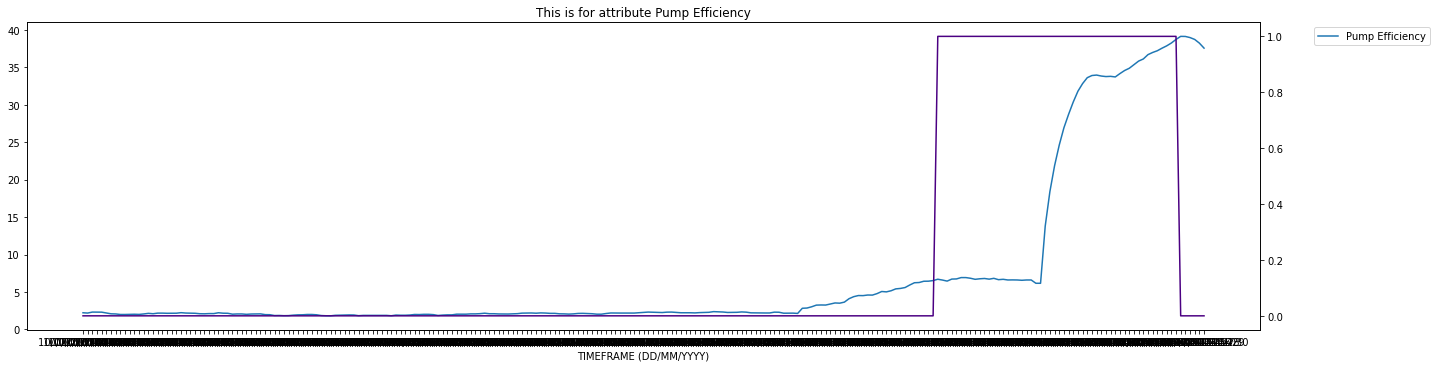

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

### Step 10: <span style="color:purple">Create a Heatmap</span> 

Create a heatmap that clearly shows the correlations (including R Squared) for all variables using the dataframe_raw dataset.


## Please put your code here

Text(0.5, 1.0, 'Heatmap w/respect to Failure Mode with Raw Features')

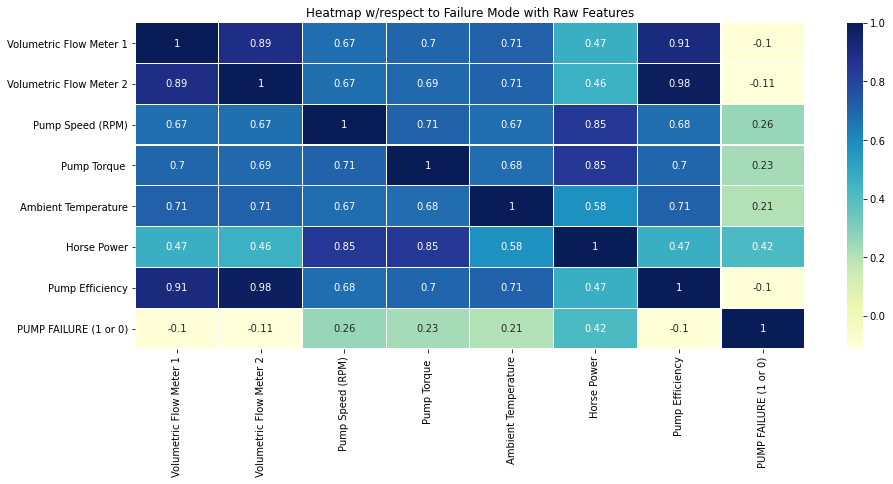

In [15]:
df_corr = df_raw.iloc[:,2:]
correlation = df_corr.corr()
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(correlation, annot = True, linewidths = 0.25, cmap="YlGnBu")
plt.title('Heatmap w/respect to Failure Mode with Raw Features')


**Open-ended Question:**

Which variables seem to correlate with Pump Failure?


In [ ]:
# Volumetric Flow Meter 1 & 2 and Pump Efficiency have a weaker negative correlation w.r.t the pump failure. 
# Horse Power has the highest positive correlation w.r.t pump failure among all other variables.



### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.



### Please put your code here

<Figure size 7200x7200 with 0 Axes>

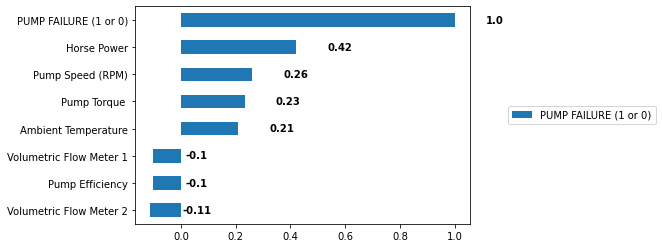

In [148]:
plt.figure(figsize = (100,100))
last_col = round(correlation.iloc[:, 7], 2)
correlation.sort_values('PUMP FAILURE (1 or 0)',inplace=True)
barplot = correlation[["PUMP FAILURE (1 or 0)"]].plot(kind='barh')
plt.legend(loc = 'center left', bbox_to_anchor=(1.1,0.5), fontsize = 'medium')
for i, v in enumerate(last_col):
    barplot.text(v + .115, i -.1, str(v), color='black', fontweight='bold')


### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
This time, we'll recreate a Heatmap using the rolling standard deviation dataframe you had imported in Q1.

Create a heatmap that clearly shows the correlations (including R Squared) for all variables using the dataframe_stdev dataset.



Text(0.5, 1.0, 'Heatmap of Standard Deviation of Variables w/respect to Failure Mode')

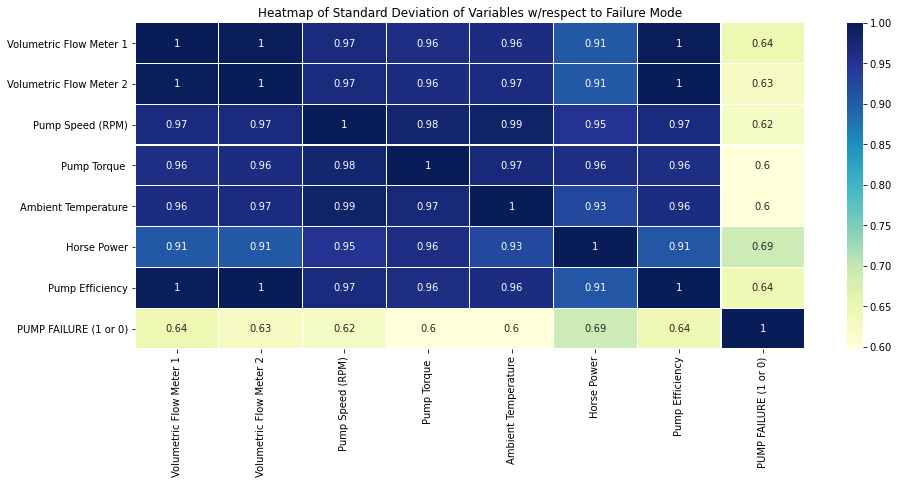

In [8]:

df_corr1 = df_stdev.iloc[:,2:]
correlation = df_corr1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(correlation, annot = True, linewidths = 0.25, cmap="YlGnBu")
plt.title('Heatmap of Standard Deviation of Variables w/respect to Failure Mode')

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation.

### Step 13: <span style="color:purple">Use OLS Regression</span> 
i) Create a linear regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0).

ii) Repeat i) but this time use the dataframe_stdev you imported previously. What is the R Squared for the model and what does this signify?



## Please put your code here 

In [22]:
X = df_raw[['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']]
X = sm.add_constant(X)
Y = df_raw['PUMP FAILURE (1 or 0)']
OLSmodel = sm.OLS(Y,X)
OLSmodelResult = OLSmodel.fit()
print(OLSmodelResult.summary())


print()
print()
print()



X1 = df_stdev[['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)','Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']]
X1 = sm.add_constant(X1)
Y1 = df_stdev['PUMP FAILURE (1 or 0)']
OLSmodel1 = sm.OLS(Y1,X1)
OLSmodelResult1 = OLSmodel1.fit()
print(OLSmodelResult1.summary())


                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Wed, 20 Jan 2021   Prob (F-statistic):          5.58e-233
Time:                           21:38:21   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Which linear regression model seems to be a better fit? Why do you think this is the case?


Although linear regression model of df_stdev has a higher R-Squared value than df_raw, the model itself is not a good fit for the data since it becomes a classification issue and another model such as Logistic Regression or Decision Tree needs to be used

Great job creating those regressive equations! You've reached the final step of this case study!
### Step 14: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'


## Please put your code here

In [20]:
ypred1 = OLSmodelResult1.predict(X1)
ypred1


0       0.012455
1       0.005693
2       0.001593
3      -0.004978
4      -0.009635
          ...   
2447    0.063612
2448    0.082757
2449    0.089230
2450    0.081646
2451    0.025040
Length: 2452, dtype: float64

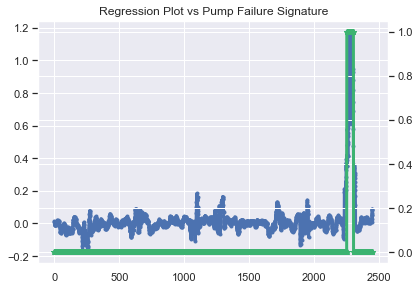

In [51]:
ax5 = ypred1.plot(linewidth = 3, marker = '.')
ax6 = ax5.twinx()
ax6.plot(df_stdev['PUMP FAILURE (1 or 0)'], 'mediumseagreen', linewidth = 3, marker = '*')
plt.tight_layout()
plt.title('Regression Plot vs Pump Failure Signature')
plt.show()

You've made it to the end of this challenging case study — well done! You've now converted all of the analysis you did for Southern Water Corp using Excel into Python. You created visualizations using Seaborn, manipulated datasets with pandas, and so much more! This case study was designed to give you practice using Python to analyze datasets both large and small — you can now apply these skills to work you do throughout your career as a data analyst.

